In [35]:
import pandas as pd
import numpy as np

### Joining datasets

In [36]:
#FIFA DATA  
data_fifa_folder = 'data/fifa/'

fifa_tournament_standings = pd.read_csv(data_fifa_folder + 'tournament_standings.csv')
#fifa_tournament_standings[fifa_tournament_standings['tournament_id'].str.contains('1998') == True].head()
fifa_tournament_standings.head()

,key_id,tournament_id,tournament_name,position,team_id,team_name,team_code
0,1,WC-1930,1930 FIFA Men's World Cup,1,T-84,Uruguay,URY
1,2,WC-1930,1930 FIFA Men's World Cup,2,T-03,Argentina,ARG
2,3,WC-1930,1930 FIFA Men's World Cup,3,T-83,United States,USA
3,4,WC-1930,1930 FIFA Men's World Cup,4,T-87,Yugoslavia,YUG
4,5,WC-1934,1934 FIFA Men's World Cup,1,T-41,Italy,ITA


In [37]:
#Olympics DATA
data_olympics_folder = 'data/olympic_games/'
olympics_results = pd.read_csv(data_olympics_folder + 'olympic_results.csv')
olympics_results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [38]:
olympics_results['participant_type'].unique()

array(['GameTeam', 'Athlete'], dtype=object)

In [39]:
#olympics_results[olympics_results['participant_type'] == 'Athlete']['discipline'].unique()
olympics_results.loc[olympics_results['participant_type'] == 'GameTeam', 'discipline_title'].unique()

array(['Curling', 'Freestyle Skiing', 'Short Track Speed Skating',
       'Snowboard', 'Ski Jumping', 'Figure skating', 'Luge', 'Ice Hockey',
       'Biathlon', 'Alpine Skiing', 'Cross Country Skiing',
       'Speed skating', 'Nordic Combined', 'Bobsleigh', 'Shooting',
       'Diving', 'Canoe Sprint', 'Football', 'Artistic Swimming',
       'Handball', 'Rugby Sevens', 'Triathlon', 'Table Tennis',
       'Volleyball', 'Basketball', 'Cycling Track', 'Fencing',
       'Badminton', 'Water Polo', 'Tennis', 'Artistic Gymnastics', 'Judo',
       'Archery', 'Baseball/Softball', 'Equestrian', 'Athletics',
       'Swimming', 'Sailing', 'Rowing', '3x3 Basketball',
       'Rhythmic Gymnastics', 'Hockey', 'Beach Volleyball', 'Short Track',
       'Rugby', 'Gymnastics Rhythmic', 'Equestrian Jumping',
       'Gymnastics Artistic', 'Canoe Slalom', 'Synchronized Swimming',
       'Equestrian Eventing', 'Equestrian Dressage', 'Baseball',
       'Softball', 'Cycling Road', 'Modern Pentathlon', 'Canoe Mar

In [40]:
olympics_results[
    (olympics_results['discipline_title'] == 'Football') & 
    (olympics_results['event_title'].str.contains('omen'))
]['event_title'].unique()
#olympics_results[olympics_results['participant_type'] == 'Athlete'].head

array(['Women', 'football women', 'tournament women'], dtype=object)

In [41]:
olympics_results[
    #(olympics_results['discipline_title'] == 'Rugby Sevens') & 
    (olympics_results['event_title'].str.contains('omen'))
]['discipline_title'].unique()
#olympics_results[olympics_results['participant_type'] == 'Athlete'].head

array(['Curling', 'Freestyle Skiing', 'Short Track Speed Skating',
       'Snowboard', 'Ski Jumping', 'Figure skating', 'Luge', 'Ice Hockey',
       'Biathlon', 'Alpine Skiing', 'Skeleton', 'Cross Country Skiing',
       'Speed skating', 'Bobsleigh', 'Shooting', 'Diving', 'Canoe Sprint',
       'Cycling Road', 'Football', 'Boxing', 'Handball', 'Rugby Sevens',
       'Cycling BMX Racing', 'Triathlon', 'Surfing', 'Table Tennis',
       'Canoe Slalom', 'Marathon Swimming', 'Trampoline Gymnastics',
       'Volleyball', 'Basketball', 'Taekwondo', 'Cycling Track',
       'Fencing', 'Badminton', 'Water Polo', 'Sport Climbing',
       'Wrestling', 'Tennis', 'Artistic Gymnastics', 'Golf',
       'Cycling BMX Freestyle', 'Judo', 'Skateboarding', 'Archery',
       'Weightlifting', 'Modern Pentathlon', 'Athletics', 'Swimming',
       'Sailing', 'Cycling Mountain Bike', 'Rowing', 'Karate',
       '3x3 Basketball', 'Hockey', 'Beach Volleyball', 'Cycling BMX',
       'Rugby', 'Gymnastics Rhythmic', '

It means if we want to compare number of wins per each team between genders then we have to unify field 'event_title' for women and men, so every value that contains 'omen' (filtering is case sensitive and we want to include all values, containing both 'Women' and 'women')

## PROFILE 

Questions we want to answer: 

1. **Achievements and GDP**: we check if high values of GDP correlate with results in FIFA World Cup and Olympic Games: we need dataframe that includes *country_code, country_name, year, tournament_type (WC, Olympic Games), tournament_name (sport_name), event_gender_type (women/men), nr of achievements per year, nr of achievements per sport, GDP (the year of event happening), GDP (mean for 4 years between this and previous event)* => Visualization type: Scatter plot with GDP per capita (x-axis) and total medals/goals (y-axis), colored by continent. => Hypothesis we check: Countries with higher GDP tend to have better sports infrastructure and funding. 

2. **Population Density vs Performance**: data we need *country_code, country_name, year, tournament_type (WC, Olympic Games), tournament_name (sport_name), event_gender_type (women/men), population* => Visualization type: Line chart comparing population density (x-axis) with achievements (y-axis) across years for selected countries. => Hypothesis we check: While densely populated nations excel in team sports (e.g., FIFA), sparsely populated nations like Norway dominate certain niche events in the Olympics.

3. **Temporal Trends in Rankings**: data we need *country_code, country_name, year, tournament_type (WC, Olympic Games), tournament_name (sport_name), event_gender_type (women/men), GDP (for the year of event happening)* => Visualization type: Line chart showing GDP growth (x-axis) and total medals/goals (y-axis) for China over time. => Hypothesis we check: Economic growth over time impacts sports performance. For example, China's rising GDP since 1980 correlates with its dominance in global sports events post-2000.

4. **Hosts Economical Performance** (analogue for the 3rd insight): Data we need *tournament_type, tournament_year, host_country_code, host_country_name, GDP (for the year of event happening), GDP (for the year before the event happening), GDP (for the next year after event happened)* Hypothesis we check: Hosting such event as FIFA WC or Olympic Games usually influences country's economic situation (usually in a bad way), so we would try to see if there's a connection


### Datasets creation

Difference data needed for the 1st and 2nd insights are columns *GDP (for the year of event happening)* and *population*, so we could combine it in one dataframe. 


In [42]:
olympics_results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [43]:
# year, country_code, country_name, tournament_type (WC, Olympic Games), tournament_name (sport_name), 
# event_gender_type (women/men), nr of achievements per year, nr of achievements per sport, 
# GDP (the year of event happening), GDP (mean for 4 years between this and previous event), 
# population (for the year of event happening)
df_insights1 = olympics_results[['slug_game', 'country_code', 'country_name', 'discipline_title', 'event_title', 'rank_position']]

df_insights1[['host_city', 'year']] = olympics_results['slug_game'].str.extract(r'^(.*?)-(\d{4})$')
df_insights1.head()

C:\Users\ankys\AppData\Local\Temp\ipykernel_27240\743485779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insights1[['host_city', 'year']] = olympics_results['slug_game'].str.extract(r'^(.*?)-(\d{4})$')
C:\Users\ankys\AppData\Local\Temp\ipykernel_27240\743485779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insights1[['host_city', 'year']] = olympics_results['slug_game'].str.extract(r'^(.*?)-(\d{4})$')


,slug_game,country_code,country_name,discipline_title,event_title,rank_position,host_city,year
0,beijing-2022,IT,Italy,Curling,Mixed Doubles,1,beijing,2022
1,beijing-2022,NO,Norway,Curling,Mixed Doubles,2,beijing,2022
2,beijing-2022,SE,Sweden,Curling,Mixed Doubles,3,beijing,2022
3,beijing-2022,GB,Great Britain,Curling,Mixed Doubles,4,beijing,2022
4,beijing-2022,CA,Canada,Curling,Mixed Doubles,5,beijing,2022


In [44]:
#df_insights1[df_insights1['host_city'] == 'st']
df_insights1['year'].unique()

array(['2022', '2020', '2018', '2016', '2014', '2012', '2010', '2008',
       '2006', '2004', '2002', '2000', '1998', '1996', '1994', '1992',
       '1988', '1984', '1980', '1976', '1972', '1968', '1964', '1960',
       '1956', '1952', '1948', '1936', '1932', '1928', '1924', '1920',
       '1912', '1908', '1904', '1900', '1896'], dtype=object)

In [45]:
df_insights1['tournament_type'] = 'Olympic Games'

C:\Users\ankys\AppData\Local\Temp\ipykernel_27240\2277482411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insights1['tournament_type'] = 'Olympic Games'


In [46]:
unique_event_gender = df_insights1['event_title'].unique()

unique_values_list = unique_event_gender.tolist()

# Print the entire list
print(unique_values_list)

['Mixed Doubles', 'Women', 'Men', "Men's Moguls", "Men's Freeski Halfpipe", "Men's Freeski Big Air", "Men's Ski Cross", "Women's Freeski Big Air", "Women's Moguls", 'Mixed Team Aerials', "Women's Ski Cross", "Men's Aerials", "Women's Aerials", "Women's Freeski Halfpipe", "Women's Freeski Slopestyle", "Men's Freeski Slopestyle", "Women's 500m", "Men's 500m", "Men's 5000m Relay", 'Team Relay', "Men's 1500m", "Men's 1000m", "Women's 3000m Relay", "Women's 1000m", "Women's 1500m", "Women's Snowboard Halfpipe", 'Mixed Team Snowboard Cross', "Women's Snowboard Cross", "Men's Parallel Giant Slalom", "Women's Snowboard Big Air", "Men's Snowboard Cross", "Men's Snowboard Slopestyle", "Men's Snowboard Halfpipe", "Women's Snowboard Slopestyle", "Women's Parallel Giant Slalom", "Men's Snowboard Big Air", "Men's Team", "Men's LH Individual", 'Mixed Team', "Women's NH Individual", "Men's NH Individual", 'Team Event', 'Pair Skating', 'Ice Dance', 'Women Single Skating', 'Men Single Skating', 'Doubles

In [47]:
def categorize_event(event_name):
    if 'Women' in event_name or 'Ladies' in event_name or 'Omen' in event_name or 'omen' in event_name:
        return 'Women'
    elif 'Men' in event_name or ' men' in event_name or 'men' in event_name:
        return 'Men'
    else:
        return 'Mixed' # Assign NaN if it doesn't match any category

# Apply the function to the column
df_insights1['gender_category'] = df_insights1['event_title'].apply(categorize_event)

# Display the first few rows with the new column
print(df_insights1[['event_title', 'gender_category']].head())

     event_title gender_category
0  Mixed Doubles           Mixed
1  Mixed Doubles           Mixed
2  Mixed Doubles           Mixed
3  Mixed Doubles           Mixed
4  Mixed Doubles           Mixed


C:\Users\ankys\AppData\Local\Temp\ipykernel_27240\984388698.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insights1['gender_category'] = df_insights1['event_title'].apply(categorize_event)


In [48]:
# Count the number of NaN values in the 'category' column
df_insights1['gender_category'].unique()


array(['Mixed', 'Women', 'Men'], dtype=object)

In [49]:
df_insights1[df_insights1['event_title'].str.contains(' men')]

,slug_game,country_code,country_name,discipline_title,event_title,rank_position,host_city,year,tournament_type,gender_category
14370,rio-2016,US,United States of America,Cycling BMX,Individual men,1,rio,2016,Olympic Games,Men
14371,rio-2016,NL,Netherlands,Cycling BMX,Individual men,2,rio,2016,Olympic Games,Men
14372,rio-2016,CO,Colombia,Cycling BMX,Individual men,3,rio,2016,Olympic Games,Men
14373,rio-2016,US,United States of America,Cycling BMX,Individual men,4,rio,2016,Olympic Games,Men
14374,rio-2016,CA,Canada,Cycling BMX,Individual men,5,rio,2016,Olympic Games,Men
...,...,...,...,...,...,...,...,...,...,...
162798,chamonix-1924,IT,Italy,Ski Jumping,Normal Hill Individual men,DNS,chamonix,1924,Olympic Games,Men
162799,chamonix-1924,PL,Poland,Ski Jumping,Normal Hill Individual men,DNS,chamonix,1924,Olympic Games,Men
162800,chamonix-1924,PL,Poland,Ski Jumping,Normal Hill Individual men,DNS,chamonix,1924,Olympic Games,Men
162801,chamonix-1924,CSHH,Czechoslovakia,Ski Jumping,Normal Hill Individual men,DNS,chamonix,1924,Olympic Games,Men


In [50]:
data_fifa_folder = 'data/fifa/'

fifa_tournament_standings = pd.read_csv(data_fifa_folder + 'tournament_standings.csv')

fifa_teams = pd.read_csv(data_fifa_folder + 'teams.csv')
fifa_host_countries = pd.read_csv(data_fifa_folder + 'host_countries.csv')

fifa_teams['team_code'] = fifa_teams['team_code'].str.strip().str.upper()
fifa_host_countries['team_code'] = fifa_host_countries['team_code'].str.strip().str.upper()
fifa_teams.head()

,key_id,team_id,team_name,team_code,mens_team,womens_team,federation_name,region_name,confederation_id,confederation_name,confederation_code,mens_team_wikipedia_link,womens_team_wikipedia_link,federation_wikipedia_link
0,1,T-01,Algeria,DZA,1,0,Algerian Football Federation,Africa,CF-2,Confederation of African Football,CAF,https://en.wikipedia.org/wiki/Algeria_national...,not applicable,https://en.wikipedia.org/wiki/Algerian_Footbal...
1,2,T-02,Angola,AGO,1,0,Angolan Football Federation,Africa,CF-2,Confederation of African Football,CAF,https://en.wikipedia.org/wiki/Angola_national_...,not applicable,https://en.wikipedia.org/wiki/Angolan_Football...
2,3,T-03,Argentina,ARG,1,1,Argentine Football Association,South America,CF-4,South American Football Confederation,CONMEBOL,https://en.wikipedia.org/wiki/Argentina_nation...,https://en.wikipedia.org/wiki/Argentina_women'...,https://en.wikipedia.org/wiki/Argentine_Footba...
3,4,T-04,Australia,AUS,1,1,Football Australia,Oceania,CF-1,Asian Football Confederation,AFC,https://en.wikipedia.org/wiki/Australia_men%27...,https://en.wikipedia.org/wiki/Australia_women'...,https://en.wikipedia.org/wiki/Football_Australia
4,5,T-05,Austria,AUT,1,0,Austrian Football Association,Europe,CF-6,Union of European Football Associations,UEFA,https://en.wikipedia.org/wiki/Austria_national...,not applicable,https://en.wikipedia.org/wiki/Austrian_Footbal...


In [54]:
# Step 1: Clean and Extract 'year' from fifa_tournament_standings
fifa_standings = fifa_tournament_standings.copy()
fifa_standings['year'] = fifa_standings['tournament_id'].str.extract(r'(\d{4})').astype(int)
fifa_standings['gender_category'] = fifa_standings['tournament_name'].apply(
    lambda x: 'Women' if 'Women' in x else 'Men'
)

# Step 2: Keep Only Required Columns (Ensure 'team_code' is retained)
fifa_standings_clean = fifa_standings[['year', 'team_name', 'team_code', 'position', 'gender_category']]

# Step 3: Add Host City from fifa_host_countries
fifa_hosts = fifa_host_countries.copy()
fifa_hosts['year'] = fifa_hosts['tournament_id'].str.extract(r'(\d{4})').astype(int)
fifa_hosts = fifa_hosts[['team_name', 'year']].drop_duplicates()
fifa_hosts = fifa_hosts.rename(columns={'team_name': 'host_city'})

# Step 4: Merge Host City with FIFA Standings
fifa_data = fifa_standings_clean.merge(
    fifa_hosts,
    on='year',
    how='left'
)

# Step 5: Add Required Columns for Consistency with Olympics Data
fifa_data['slug_game'] = 'fifa-' + fifa_data['year'].astype(str)
fifa_data['discipline_title'] = 'Football'
fifa_data['event_title'] = 'FIFA World Cup'
fifa_data['tournament_type'] = 'FIFA'

# Step 6: Select and Rename Columns to Match Olympics Data
fifa_data_final = fifa_data[[
    'slug_game', 'team_code', 'team_name', 'discipline_title',
    'event_title', 'position', 'host_city', 'year', 'tournament_type', 'gender_category'
]].rename(columns={
    'team_code': 'country_code',
    'team_name': 'country_name',
    'position': 'rank_position'
})

# Step 7: Combine FIFA Data with Olympics Data
combined_data = pd.concat([df_insights1, fifa_data_final], ignore_index=True)

# Display Combined Data
print("Combined Data Sample:")
print(combined_data)


Combined Data Sample:
           slug_game country_code   country_name discipline_title  \
0       beijing-2022           IT          Italy          Curling   
1       beijing-2022           NO         Norway          Curling   
2       beijing-2022           SE         Sweden          Curling   
3       beijing-2022           GB  Great Britain          Curling   
4       beijing-2022           CA         Canada          Curling   
...              ...          ...            ...              ...   
162923     fifa-2019          ENG        England         Football   
162924     fifa-2022          ARG      Argentina         Football   
162925     fifa-2022          FRA         France         Football   
162926     fifa-2022          HRV        Croatia         Football   
162927     fifa-2022          MAR        Morocco         Football   

           event_title rank_position host_city  year tournament_type  \
0        Mixed Doubles             1   beijing  2022   Olympic Games   
1    

In [55]:
combined_data


,slug_game,country_code,country_name,discipline_title,event_title,rank_position,host_city,year,tournament_type,gender_category
0,beijing-2022,IT,Italy,Curling,Mixed Doubles,1,beijing,2022,Olympic Games,Mixed
1,beijing-2022,NO,Norway,Curling,Mixed Doubles,2,beijing,2022,Olympic Games,Mixed
2,beijing-2022,SE,Sweden,Curling,Mixed Doubles,3,beijing,2022,Olympic Games,Mixed
3,beijing-2022,GB,Great Britain,Curling,Mixed Doubles,4,beijing,2022,Olympic Games,Mixed
4,beijing-2022,CA,Canada,Curling,Mixed Doubles,5,beijing,2022,Olympic Games,Mixed
...,...,...,...,...,...,...,...,...,...,...
162923,fifa-2019,ENG,England,Football,FIFA World Cup,4,France,2019,FIFA,Women
162924,fifa-2022,ARG,Argentina,Football,FIFA World Cup,1,Qatar,2022,FIFA,Men
162925,fifa-2022,FRA,France,Football,FIFA World Cup,2,Qatar,2022,FIFA,Men
162926,fifa-2022,HRV,Croatia,Football,FIFA World Cup,3,Qatar,2022,FIFA,Men


Check olympic hosts dataset => before world war II summer and winter happened in the same year in the different locations, after wwii each year happened either summer or winter, and from 1992 each 2 years there were olympic games, but they changed either summer or winter games

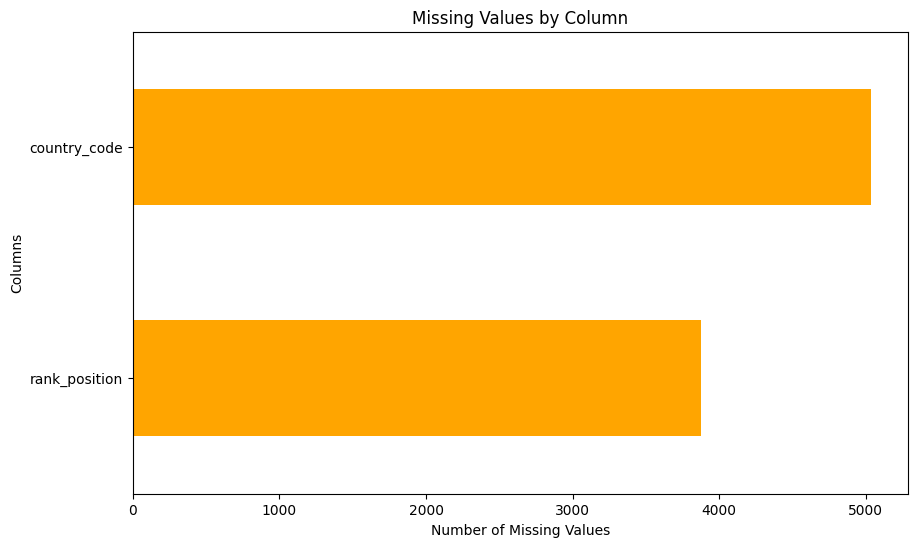

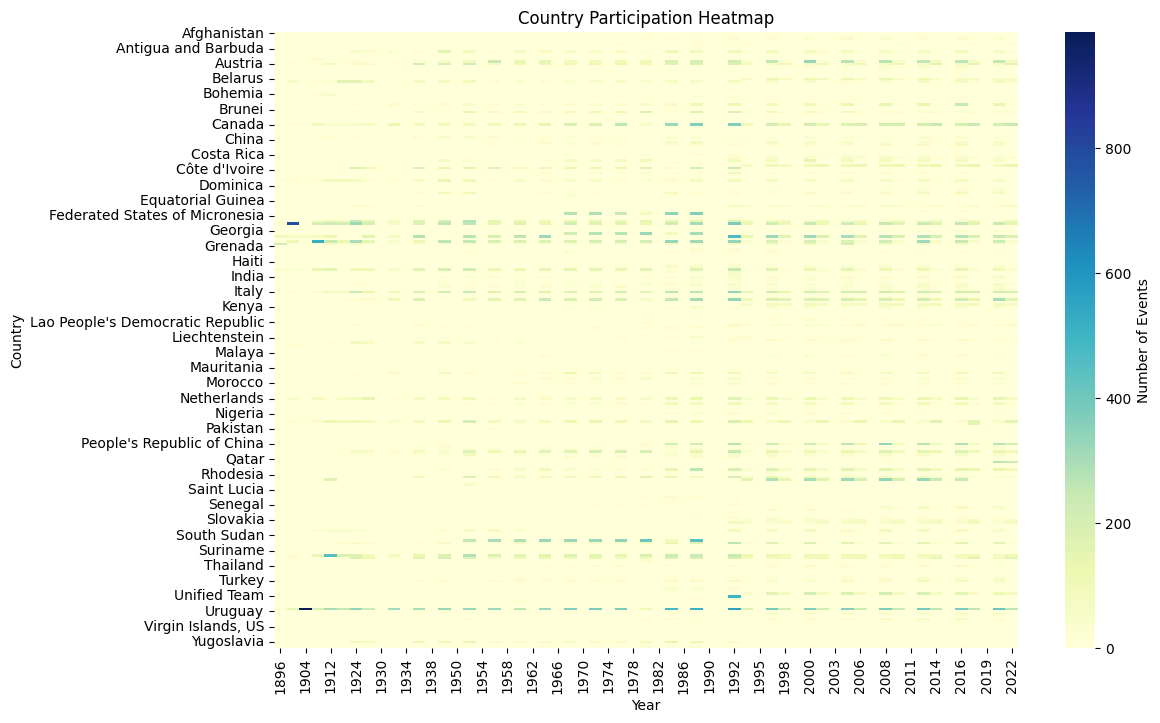

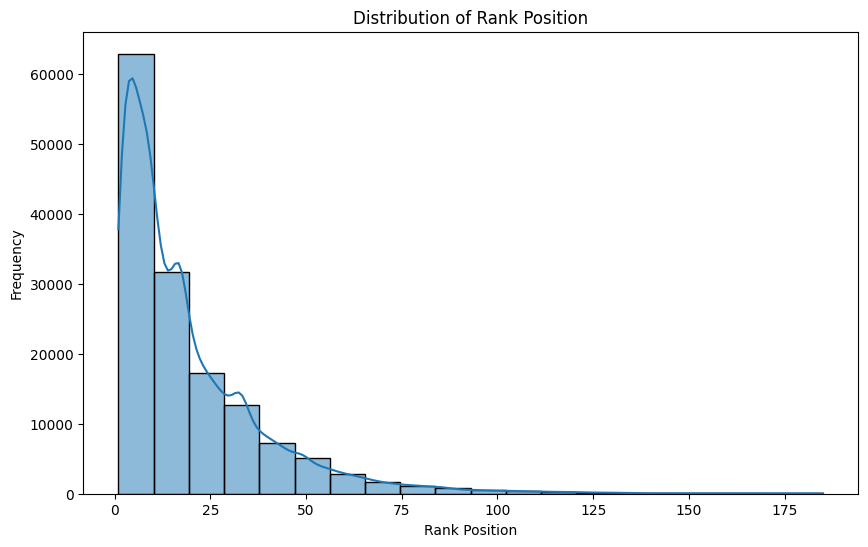

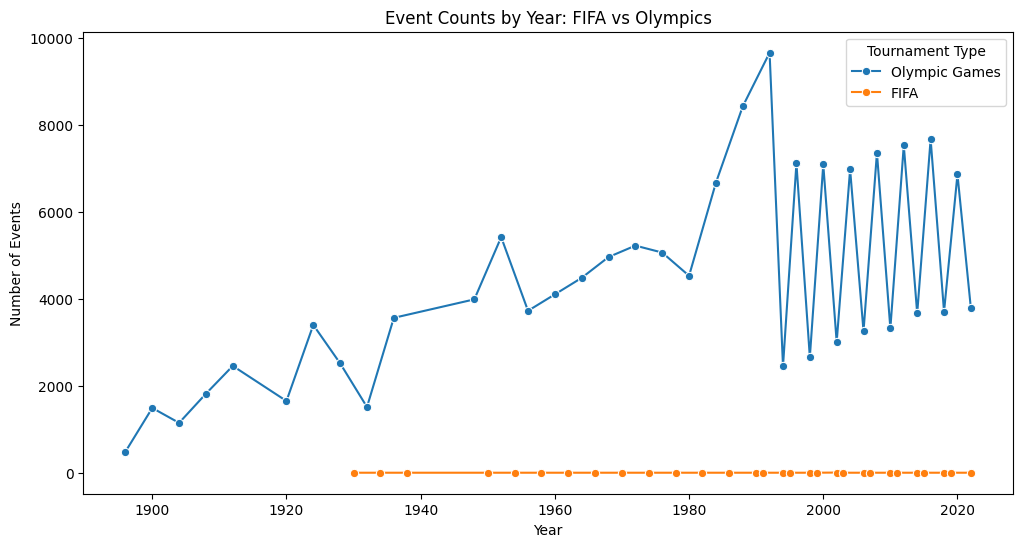

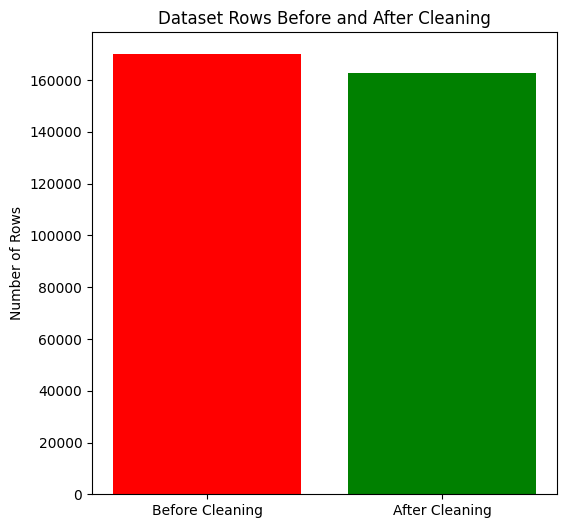

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined_data' is your final dataset after merging FIFA and Olympic data

# Step 1: Visualize Missing Values
plt.figure(figsize=(10, 6))
missing_values = combined_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values().plot(kind='barh', color='orange')
plt.title("Missing Values by Column")
plt.xlabel("Number of Missing Values")
plt.ylabel("Columns")
plt.show()

# Step 2: Ensure 'year' column is integer
combined_data['year'] = pd.to_numeric(combined_data['year'], errors='coerce')

# Step 3: Country Participation Heatmap
plt.figure(figsize=(12, 8))
country_year_counts = combined_data.pivot_table(
    index='country_name',
    columns='year',
    aggfunc='size',
    fill_value=0
)

sns.heatmap(country_year_counts, cmap="YlGnBu", cbar_kws={'label': 'Number of Events'})
plt.title("Country Participation Heatmap")
plt.ylabel("Country")
plt.xlabel("Year")
plt.show()


# Step 3: Rank Position Distribution
plt.figure(figsize=(10, 6))
combined_data['rank_position'] = pd.to_numeric(combined_data['rank_position'], errors='coerce')  # Handle non-numeric ranks
sns.histplot(combined_data['rank_position'].dropna(), bins=20, kde=True)
plt.title("Distribution of Rank Position")
plt.xlabel("Rank Position")
plt.ylabel("Frequency")
plt.show()

# Step 4: Event Counts by Year (FIFA vs Olympics)
plt.figure(figsize=(12, 6))
event_counts = combined_data.groupby(['year', 'tournament_type']).size().reset_index(name='event_count')
sns.lineplot(data=event_counts, x='year', y='event_count', hue='tournament_type', marker="o")
plt.title("Event Counts by Year: FIFA vs Olympics")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.legend(title="Tournament Type")
plt.show()

# Step 5: Rows Before and After Cleaning
# Replace 'initial_rows' with the initial count before cleaning
initial_rows = 170000  # Example placeholder, replace with actual count
final_rows = combined_data.shape[0]

plt.figure(figsize=(6, 6))
plt.bar(["Before Cleaning", "After Cleaning"], [initial_rows, final_rows], color=['red', 'green'])
plt.title("Dataset Rows Before and After Cleaning")
plt.ylabel("Number of Rows")
plt.show()
